<a href="https://colab.research.google.com/github/Roghiehghahremani/Deep-Learning-With-PyTorch---Full-Course_Patrick-Loeber/blob/main/13_Feed_Forward_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# MNIST
# DataLoader, Transformation
# MUltilayer Neural Net, Activation Function
# Loss and optimizer
# Training loop (batch training)
# Model Evaluation
# GPU support

In [30]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive/')
%cd /content/drive/MyDrive/DLPyTorch_Patrick_Loeber

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive/DLPyTorch_Patrick_Loeber


In [31]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [32]:
# device config

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


In [33]:
# hyper parameters
input_size = 784 # 28*28
hidden_size = 100
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.01

In [34]:
# MNIST
train_dataset = torchvision.datasets.MNIST(root = './data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root = './data',train=False, transform=transforms.ToTensor())


In [35]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size,shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape,labels.shape)


torch.Size([100, 1, 28, 28]) torch.Size([100])


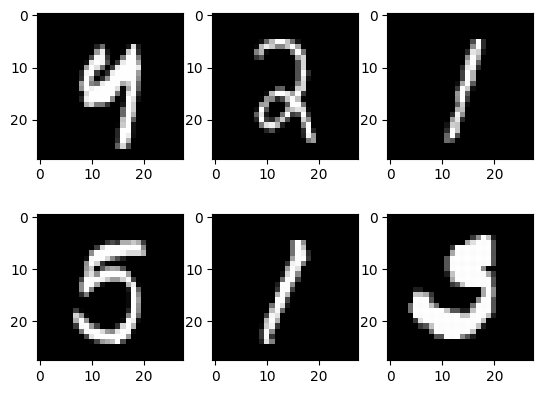

In [36]:
for i in range(6):
  plt.subplot(2,3, i+1)
  plt.imshow(samples[i][0],cmap='grey')
plt.show()

In [37]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1 = nn.Linear(input_size,hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out

model = NeuralNet(input_size,hidden_size,num_classes)

# loss and optimizer

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)

# training loop

n_total_steps =  len(train_loader)

for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(train_loader):
    # 100 1 28 28
    # 100 784
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)

    # forward pass
    outputs = model(images)
    loss = criterion(outputs,labels)
    # backward pass
    optimizer.zero_grad() # empty the gredient in gradient attribute

    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
      print(f'epoch {epoch + 1} / {num_epochs}, step {i + 1} / {n_total_steps} loss = {loss.item():.3f} ')







epoch 1 / 2, step 100 / 600 loss = 0.315 
epoch 1 / 2, step 200 / 600 loss = 0.223 
epoch 1 / 2, step 300 / 600 loss = 0.135 
epoch 1 / 2, step 400 / 600 loss = 0.137 
epoch 1 / 2, step 500 / 600 loss = 0.120 
epoch 1 / 2, step 600 / 600 loss = 0.165 
epoch 2 / 2, step 100 / 600 loss = 0.068 
epoch 2 / 2, step 200 / 600 loss = 0.077 
epoch 2 / 2, step 300 / 600 loss = 0.044 
epoch 2 / 2, step 400 / 600 loss = 0.087 
epoch 2 / 2, step 500 / 600 loss = 0.129 
epoch 2 / 2, step 600 / 600 loss = 0.027 


In [38]:
# test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images,labels in test_loader:
    images = images.reshape(-1,28*28).to(device)
    labels = labels.to(device)
    outputs = model(images)
    # value, index
    _,predictions = torch.max(outputs,1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item()
  acc = 100.0 * n_correct/n_samples
  print(f'accuracy = {acc}')

accuracy = 97.08
